# Day 6: K-Nearest Neighbors (KNN) Classification
**Objective:** Understand and implement KNN for classification problems.
**Tools:** Scikit-learn, Pandas, Matplotlib

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("../data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Step 3: Explore & Preprocess Data
print("Dataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Missing Values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [7]:
x=df.drop(["Id","Species"],axis=1)
y=df["Species"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)


In [11]:
accuracies = []
k_values = range(1, 11)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} → Accuracy: {acc:.3f}")

K=1 → Accuracy: 0.967
K=2 → Accuracy: 1.000
K=3 → Accuracy: 1.000
K=4 → Accuracy: 1.000
K=5 → Accuracy: 1.000
K=6 → Accuracy: 1.000
K=7 → Accuracy: 1.000
K=8 → Accuracy: 1.000
K=9 → Accuracy: 1.000
K=10 → Accuracy: 1.000


In [18]:
best_k = k_values[np.argmax(accuracies)]
print(f"\n✅ Best K = {best_k}")
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train, y_train)
y_pred_best = knn_best.predict(x_test)


✅ Best K = 2


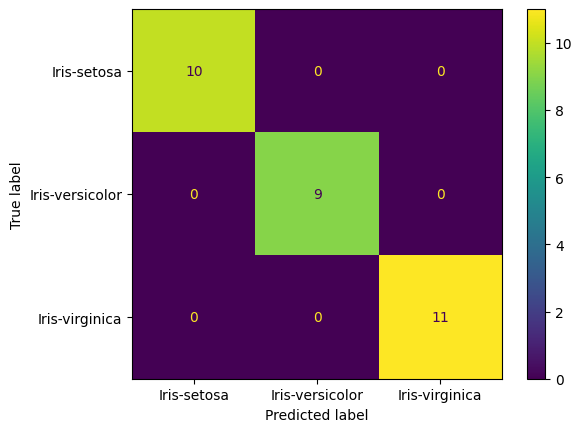

In [31]:
cm=confusion_matrix(y_test,y_pred_best)
ConfusionMatrixDisplay(cm, display_labels=df["Species"].unique()).plot()
plt.savefig("../Visualizations/confusion_matrix.jpg")
plt.show()